In [1]:
import pandas as pd


In [2]:
import numpy as np

In [6]:
exam = pd.read_csv("used-cars_2cities_prep_py.csv", encoding="utf-8") # we are doing this to read a csv file, so we can work on it

In [8]:
exam.describe() #describe shows more information about our data set

,odometer,dealer,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,13.031974,0.227687,5866.153005,8.299096,2005.816029,12.183971,2.416037,0.200364,0.063752,0.091075,0.041894
std,7.197456,0.419722,5657.673934,1.018207,5.887079,5.887079,0.637327,0.400638,0.244534,0.287978,0.200530
min,0.070000,0.000000,1.000000,0.000000,1991.000000,1.000000,-2.659260,0.000000,0.000000,0.000000,0.000000
25%,8.304973,0.000000,2400.000000,7.783224,2002.000000,8.000000,2.116855,0.000000,0.000000,0.000000,0.000000
50%,13.655900,0.000000,4300.000000,8.366370,2006.000000,12.000000,2.614172,0.000000,0.000000,0.000000,0.000000
75%,16.450363,0.000000,8299.000000,9.023890,2010.000000,16.000000,2.800348,0.000000,0.000000,0.000000,0.000000
max,118.000000,1.000000,90002.000000,11.407587,2017.000000,27.000000,4.770685,1.000000,1.000000,1.000000,1.000000


In [9]:
exam.head() # These are the first five rows of the data set shown (head command instead of describe)

,pricestr,area,subarea,name,condition,cylinders,drive,fuel,odometer,paintcolor,...,dealer,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid
0,$4990,chicago,chicago city,2007 Toyota Camry Hybrid,good,4 cylinders,fwd,gas,11.6236,grey,...,1,4990,8.515191,2007,11,2.453038,0,0,0,1
1,$10625,chicago,chicago city,2009 Toyota Camry Hybrid,NaN,4 cylinders,fwd,hybrid,4.3702,grey,...,1,10625,9.270965,2009,9,1.474809,0,0,0,1
2,$14850,chicago,chicago city,2015 Toyota_ Camry_,excellent,other,NaN,gas,3.5721,NaN,...,1,14850,9.605755,2015,3,1.273154,0,0,0,0
3,$15630,chicago,chicago city,2016 TOYOTA CAMRY,NaN,NaN,fwd,gas,1.3152,NaN,...,1,15630,9.656947,2016,2,0.273989,0,0,0,0
4,$850,chicago,chicago city,1993 toyota camry,good,6 cylinders,fwd,gas,18.7000,red,...,0,850,6.745236,1993,25,2.928524,0,0,0,0


In [10]:
exam.shape # This shows me how many observations and variables I have, in this case we have 549 obs and 23 var

(549, 23)

In [11]:
exam["cylinders"].isnull().sum() # This shows our missing values for the varibles, in the data set shown as NaN or N/A or just a dot. In this case it's NaN

189

In [12]:
exam["condition"].isnull().sum()

222

In [13]:
exam["drive"].isnull().sum()

255

In [14]:
exam["size"].isnull().sum()

356

In [16]:
exam.loc[exam["drive"].isnull()] # This code shows us the location of the mising values (shows NaN - missing)

,pricestr,area,subarea,name,condition,cylinders,drive,fuel,odometer,paintcolor,...,dealer,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid
2,$14850,chicago,chicago city,2015 Toyota_ Camry_,excellent,other,NaN,gas,3.572100,NaN,...,1,14850,9.605755,2015,3,1.273154,0,0,0,0
6,$1600,chicago,chicago city,1998 toyota camry le,NaN,NaN,NaN,gas,16.824258,NaN,...,0,1600,7.377759,1998,20,2.822822,1,0,0,0
7,$1500,chicago,chicago city,1998 Toyota Camry,NaN,NaN,NaN,gas,16.824258,NaN,...,0,1500,7.313220,1998,20,2.822822,0,0,0,0
11,$3500,chicago,chicago city,2002 toyota camry,NaN,NaN,NaN,gas,14.326721,NaN,...,0,3500,8.160518,2002,16,2.662126,0,0,0,0
12,$1100,chicago,chicago city,2003 Toyota CAMRY XLE,NaN,NaN,NaN,gas,14.081671,white,...,0,1100,7.003065,2003,15,2.644874,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,$1,los angeles,North LA county,2004 toyota camry,like new,NaN,NaN,gas,11.300000,NaN,...,0,1,0.000000,2004,14,2.424803,0,0,0,0
545,$6800,los angeles,central LA,2012 toyota camry se,excellent,4 cylinders,NaN,gas,8.304973,NaN,...,0,6800,8.824678,2012,6,2.116855,0,0,1,0
546,$2000,los angeles,central LA,2008 TOYOTA CAMRY,NaN,NaN,NaN,gas,12.548112,NaN,...,0,2000,7.600902,2008,10,2.529570,0,0,0,0
547,$2700,los angeles,San Fernando,2002 toyota camry,excellent,4 cylinders,NaN,gas,16.100000,NaN,...,0,2700,7.901007,2002,16,2.778819,0,0,0,0


In [18]:
exam = exam.loc[exam["drive"].notnull()] #deleting NaN

In [19]:
exam["drive"].isnull().sum() # Sum equals to zero because we deleted them. The same can be done for the other variables

0

In [20]:
exam = exam.loc[exam["cylinders"].notnull()]

In [21]:
exam["cylinders"].isnull().sum()

0

In [22]:
exam = exam.loc[exam["size"].notnull()]

In [23]:
exam = exam.loc[exam["condition"].notnull()]

In [24]:
exam["size"].isnull().sum()

0

In [25]:
exam["condition"].isnull().sum()

0

In [32]:
exam.drop(
    columns=[
        "LE",
        "XLE",
        "SE",
        "Hybrid",
        "odometer"
    ],
    inplace= True
)
#drop command for unuseful variables, I reran it again that's why it shows the error, but I already dropped them

KeyError: "['LE', 'XLE', 'SE', 'Hybrid', 'odometer'] not found in axis"

In [29]:
exam.shape

(154, 18)

In [30]:
exam.describe().transpose() #to see a stats table

,count,mean,std,min,25%,50%,75%,max
dealer,154.0,0.220779,0.416125,0.000000,0.000000,0.000000,0.000000,1.000000
price,154.0,5330.616883,4076.157979,361.000000,2325.000000,3950.000000,7150.000000,18500.000000
lnprice,154.0,8.254349,0.874567,5.888878,7.751304,8.281471,8.874794,9.825526
year,154.0,2005.266234,5.873439,1991.000000,2001.000000,2005.000000,2009.750000,2017.000000
age,154.0,12.733766,5.873439,1.000000,8.250000,13.000000,17.000000,27.000000
lnodometer,154.0,2.439393,0.738111,-2.659260,2.324261,2.645524,2.828255,4.770685


In [33]:
exam.drop(
    columns=[
        "paintcolor"
    ],
    inplace= True
)

In [34]:
exam.shape

(154, 17)

<AxesSubplot:>

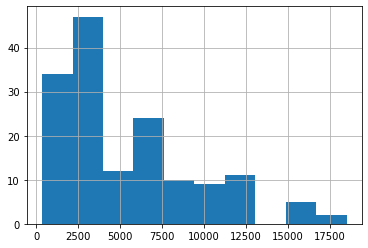

In [35]:
exam.price.hist() #shows a histogram and we can see it's scewed to the right here

In [42]:
for index, row in exam.iterrows():
    name = row['name']
    year = row['year']
    price = row['price']
    
    if year <= 2002:
        print(f"{name} is old, that's why the price is {price}")
    elif 2010 <= year <= 2016:
        print(f"{name} is fairly new, that's why the price is {price}")
    else:
        print(f"{name} is like new, that's why the price is {price}")


1993 toyota camry is old, that's why the price is 850
2000 toyota camry le is old, that's why the price is 2295
2005 toyota camry LE is like new, that's why the price is 4200
2007 toyota camry is like new, that's why the price is 4500
2007 Toyota Camry SE is like new, that's why the price is 6000
2009 toyota camry se 4dr sedan is like new, that's why the price is 7200
2014 Toyota Camry XLE is fairly new, that's why the price is 14900
2010 toyota camry xle is fairly new, that's why the price is 3030
2002 toyota camry le 4cyl is old, that's why the price is 3750
2011 toyota camry se 4dr sedan is fairly new, that's why the price is 6300
2000 toyota camry is old, that's why the price is 2000
2006 Toyota Camry Solara is like new, that's why the price is 2500
2010 toyota camry le is fairly new, that's why the price is 7500
1998 Toyota Camry LX is old, that's why the price is 1850
1998 Toyota Camry LX is old, that's why the price is 1850
2008 toyota camry le is like new, that's why the price 